In [1]:
import glob
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import itertools

In [13]:
fig = go.Figure()


In [14]:
for name in glob.glob("*.txt"):
    data=np.loadtxt(name)
    fig.add_trace(go.Scatter(x=np.array(range(data.shape[0])), y=data,
                    mode='lines',
                    name=name.split(".")[0]))

In [15]:
fig.show()

In [3]:
cm_tags = {
    "notes": ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B", "REST"],
    "duration": ["1", "1/2", "1/4", "1/8", "1/16", "1/32", "1/64", "1/128"]
}

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

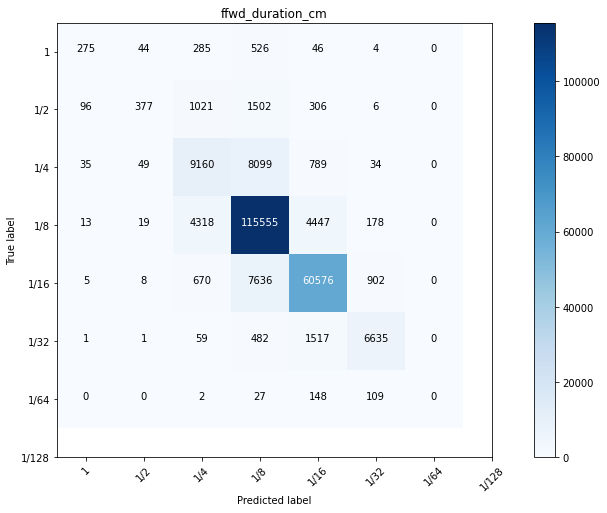

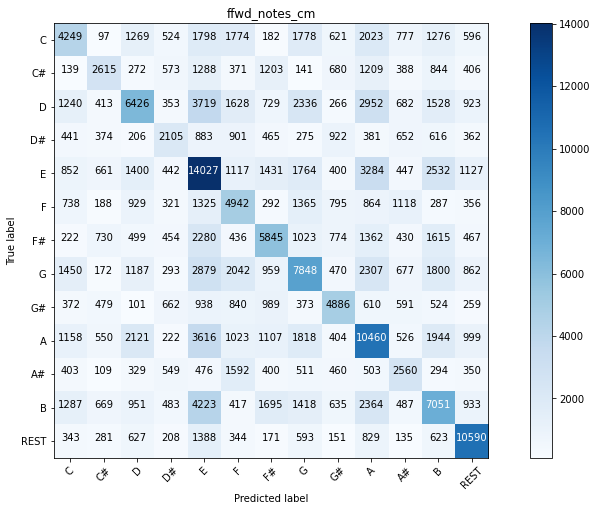

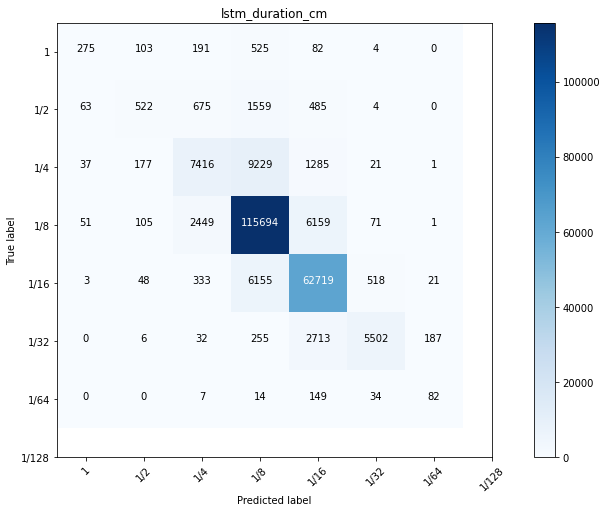

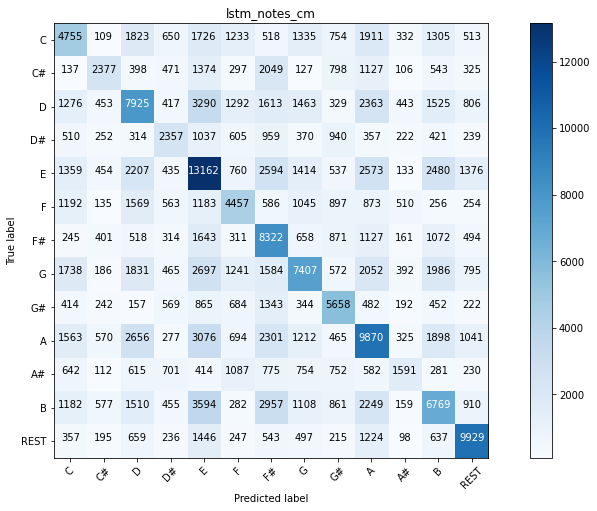

In [17]:
plt.rcParams['figure.figsize'] = [15,8]
for name in glob.glob("*.csv"):
    data=np.loadtxt(name,dtype=int)
    tags=cm_tags["notes"] if "notes" in name else cm_tags["duration"]
    display_name=name.split(".")[0]
    plot_confusion_matrix(data,
        tags,
        title=display_name,
        cmap='Blues',
        #display_labels=data.target_names
        )